In [14]:
import numpy as np
from scipy.integrate import solve_ivp

def payoff_matrix(V: float, C: float) -> np.ndarray:
    return np.array([
        [(V - C) / 2.0, V,            (V - C) / 2.0],
        [0.0,           V / 2.0,      V / 2.0],
        [(V - C) / 2.0, V / 2.0,      V / 2.0],
    ], dtype=float)

def replicator_rhs(t: float, x: np.ndarray, A: np.ndarray) -> np.ndarray:
    
    x = np.asarray(x, dtype=float)

    Ax = A @ x                    
    phi = float(x @ Ax)          
    xdot = x * (Ax - phi)

    return xdot


V, C = 2.0, 5.0
A = payoff_matrix(V, C)

x0 = np.array([0.3, 0.5, 0.2])    
t_span = (0.0, 50.0)

sol = solve_ivp(
    fun=lambda t, x: replicator_rhs(t, x, A),
    t_span=t_span,
    y0=x0,
    rtol=1e-9,
    atol=1e-12,
    dense_output=True
)


xH, xD, xR = sol.y



In [15]:
import matplotlib.pyplot as plt

def plot_solution_over_time(sol):
    import matplotlib.pyplot as plt

    t = sol.t
    xH, xD, xR = sol.y

    plt.plot(t, xH, label='Hawk (H)', color='blue')
    plt.plot(t, xD, label='Dove (D)', color='orange')
    plt.plot(t, xR, label='Retaliator (R)', color='green')

    plt.xlabel('Time')
    plt.ylabel('Proportion')
    plt.title('Replicator Dynamics of Hawk-Dove-Retaliator Game')
    plt.legend()
    plt.grid()
    plt.show(

        
    )

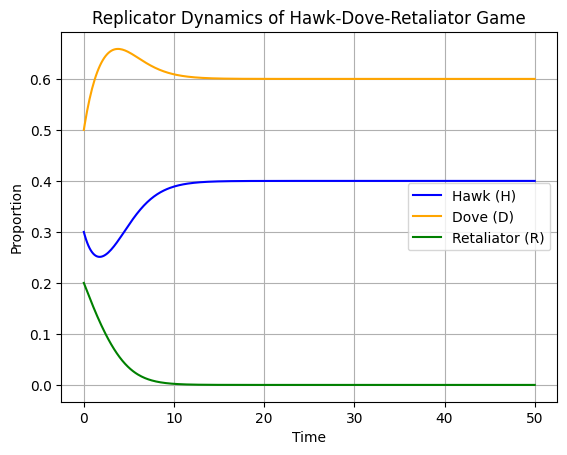

In [16]:
plot_solution_over_time(sol)

In [13]:
print("Final:", xH[-1], xD[-1], xR[-1], "sum=", (xH[-1]+xD[-1]+xR[-1]))

Final: 0.3999999999966075 0.6000000000032604 1.320087288904846e-13 sum= 0.9999999999999999


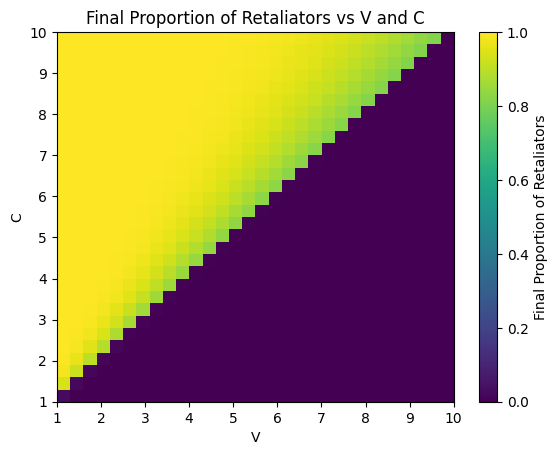

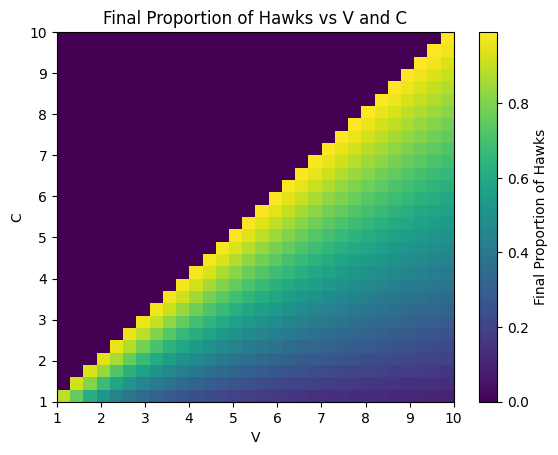

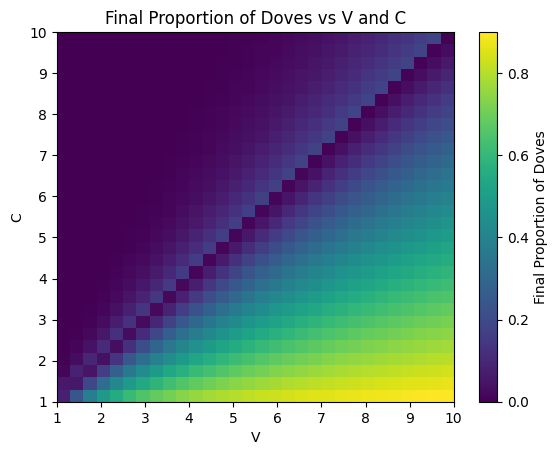

In [23]:
### this was a first plot let's how see it varies depending on V,C and the initial condition



list_V = np.linspace(1,10,30)
list_C = np.linspace(1,10,30)

R_inf = np.zeros((len(list_V), len(list_C)))
H_inf = np.zeros((len(list_V), len(list_C)))
D_inf = np.zeros((len(list_V), len(list_C)))

for i,V in enumerate(list_V):
    for j,C in enumerate(list_C):
        A = payoff_matrix(V, C)
        sol = solve_ivp(
            fun=lambda t, x: replicator_rhs(t, x, A),
            t_span=t_span,
            y0=x0,
            rtol=1e-9,
            atol=1e-12,
            dense_output=True
        )
        xH, xD, xR = sol.y
        R_inf[i,j] = xR[-1]
        H_inf[i,j] = xH[-1]
        D_inf[i,j] = xD[-1]

plt.imshow(R_inf, extent=(1,10,1,10), origin='lower', aspect='auto')
plt.colorbar(label='Final Proportion of Retaliators')
plt.xlabel('V')
plt.ylabel('C')
plt.title('Final Proportion of Retaliators vs V and C')
plt.show()  

plt.imshow(H_inf, extent=(1,10,1,10), origin='lower', aspect='auto')
plt.colorbar(label='Final Proportion of Hawks')
plt.xlabel('V')
plt.ylabel('C')
plt.title('Final Proportion of Hawks vs V and C')
plt.show()

plt.imshow(D_inf, extent=(1,10,1,10), origin='lower', aspect='auto')
plt.colorbar(label='Final Proportion of Doves')
plt.xlabel('V')
plt.ylabel('C')
plt.title('Final Proportion of Doves vs V and C')
plt.show()
